In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime as dt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

Load Data

In [ ]:
df = pd.read_csv('/content/Unemployment in India.csv')

Explore Data

In [ ]:
df.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
5,Andhra Pradesh,31-10-2019,Monthly,3.52,12017412.0,43.01,Rural
6,Andhra Pradesh,30-11-2019,Monthly,4.12,11397681.0,41.00,Rural
7,Andhra Pradesh,31-12-2019,Monthly,4.38,12528395.0,45.14,Rural
8,Andhra Pradesh,31-01-2020,Monthly,4.84,12016676.0,43.46,Rural
9,Andhra Pradesh,29-02-2020,Monthly,5.91,11723617.0,42.83,Rural


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


Data Cleaning

In [ ]:
missing=df.isnull().sum()

In [ ]:
df.dropna()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [ ]:
missing

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [ ]:
df.shape

(768, 7)

In [ ]:
df.columns=df.columns.str.strip()

In [ ]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
#currently date column in object type so let's convert it into datetime type
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
#creating new columns for better analysis
#extracting month and year from date column
df['year']=df['Date'].dt.isocalendar().year
df['month']=df['Date'].dt.month

In [ ]:
df.shape

(768, 9)

In [ ]:
df.dropna()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,year,month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019,5.0
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019,6.0
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019,7.0
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019,8.0
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019,9.0
...,...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,2020,2.0
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,2020,3.0
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,2020,4.0
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,2020,5.0


Exploratory Data Analysis

In [ ]:
df_new=df[['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']]
df_new.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
print(round(df_new.describe().T, 2))

                                         count        mean         std  \
Estimated Unemployment Rate (%)          740.0       11.79       10.72   
Estimated Employed                       740.0  7204460.03  8087988.43   
Estimated Labour Participation Rate (%)  740.0       42.63        8.11   

                                              min         25%         50%  \
Estimated Unemployment Rate (%)              0.00        4.66        8.35   
Estimated Employed                       49420.00  1190404.50  4744178.50   
Estimated Labour Participation Rate (%)     13.33       38.06       41.16   

                                                 75%          max  
Estimated Unemployment Rate (%)                15.89        76.74  
Estimated Employed                       11275489.50  45777509.00  
Estimated Labour Participation Rate (%)        45.50        72.57  


In [ ]:
df_new.corr()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Estimated Unemployment Rate (%),1.000000,-0.222876,0.002558
Estimated Employed,-0.222876,1.000000,0.011300
Estimated Labour Participation Rate (%),0.002558,0.011300,1.000000


Heatmap

<ipython-input-23-214e3ea46663>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

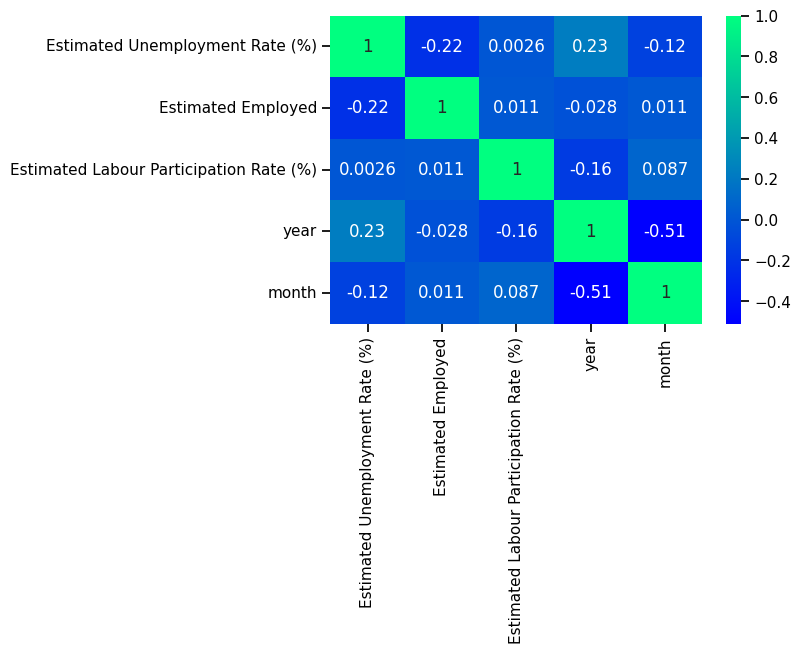

In [ ]:
heatmap=df[['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)','Area','year','month',]]
heatmap=heatmap.corr()
plt.figure(figsize=(6,4))
sns.set_context('notebook', font_scale=1)
sns.heatmap(data=heatmap, annot=True, cmap='winter')

In [ ]:
import plotly.express as px
fig = px.box(df, x='Region', y='Estimated Unemployment Rate (%)', color='Region', title='Unemployment rate per States', template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()


In [ ]:
fig = px.scatter_matrix(df,template='seaborn',dimensions=['Estimated Unemployment Rate (%)', 'Estimated Employed',
                                                          'Estimated Labour Participation Rate (%)'],color='Region')
fig.show()

In [ ]:
bar_plot = df[['Estimated Unemployment Rate (%)','Region']]
df_unemployed = bar_plot.groupby('Region').mean().reset_index()

df_unemployed = df_unemployed.sort_values('Estimated Unemployment Rate (%)')

fig = px.bar(df_unemployed, x='Region',y='Estimated Unemployment Rate (%)',color = 'Region',title = 'Average unemployment rate in each state',
             template='seaborn')
fig.show()